# Métodos iterativos

Los métodos denominados **iterativos** también pueden aplicarse a la resolución de los sistemas de ecuaciones lineales algebraicos. De manera similar a la _iteración de punto fijo_, estos métodos comienzan con un valor inicial y mejoran la estimación en cada paso, convergiendo hacia el vector solución

## Método de Jacobi

El método de Jacobi es una forma de iteración de punto fijo. Si $D$ indica la diagonal principal de $A$, $L$ indica la matriz triangular inferior de $A$ (entradas debajo de la diagonal principal), y $U$ indica la matriz triangular superior (entradas arriba de la diagonal principal). Entonces $A = L + D + U$, y la ecuación que debe resolverse es $Lx + Dx + Ux = b$.

**NOTA 1**: Observemos que el uso de $L$ y $U$ difiere del uso de la factorización $LU$, puesto que todos los elementos de las diagonales de estas $L$ y $U$ son cero.

**NOTA 2**: Como $D$ es una matriz diagonal, su inversa es la matriz recíproca de las entradas diagonales de $A$.

El sistema de ecuaciones $Ax = b$ puede reordenarse en una iteración de punto fijo de la forma:
\begin{align}
  Ax &= b \notag \\ 
  (D + L + U)x  &=  b \notag \\ 
  Dx &= b - (L + u)x \notag \\ 
  x &= D^{-1}(b-(L + U)x)
  <!-- \label{eq:iterjacobi} -->
\end{align}

### Iteración de Jacobi

Sea el sistema de ecuaciones de la forma $Ax=b$, dado un $x_0$ un vector inicial, \begin{equation} x_{k+1}=D^{-1}(b-(L + U)x_k) \label{eq:formiter}\end{equation}                                                                                                                                                            para $k=0,1,2,...$ es la forma iterativa de que converge a la solución $x$.

La solución del sistema $Ax = b$ por métodos directos bajo ciertas condiciones de tamaño y dispersión llega a ser ineficiente cuando se utilizan algoritmos directos.
Los métodos iterativos para resolver el sistema $Ax = b$ se basan en la _iteración de punto fijo_, comienzan con un punto inicial $x_0$ con el cual se estima un nuevo vector en cada paso, convegiendo a la solución.

### Implementación Método de Jacobi

In [2]:
using LinearAlgebra
using Plots

Sea el sistema de ecuaciones lineales algebráico:
 \begin{align*}
   \begin{bmatrix} 3 & 1 &- 1 \\ 2 & 4 & 1 \\ -1 & 2 & 5 \end{bmatrix}
   \begin{bmatrix} u \\ v \\ w \end{bmatrix} = \begin{bmatrix} 4 \\ 1 \\ 1 \end{bmatrix}
 \end{align*}
 
cuya solución es $x=[2, -1, 1]$ 

In [3]:
A = [3 1 -1; 2 4 1; -1 2 5]

3×3 Matrix{Int64}:
  3  1  -1
  2  4   1
 -1  2   5

In [4]:
b = [4, 1, 1]

3-element Vector{Int64}:
 4
 1
 1

La solución del sistema puede obtenerse por medio del operador `\`:

In [5]:
A\b

3-element Vector{Float64}:
  2.0
 -0.9999999999999999
  1.0

Ahora implementemos el método de Jacobi con factorización de matrices.

In [6]:
D = Diagonal(A)

3×3 Diagonal{Int64, Vector{Int64}}:
 3  ⋅  ⋅
 ⋅  4  ⋅
 ⋅  ⋅  5

In [7]:
U = triu(A, 1)

3×3 Matrix{Int64}:
 0  1  -1
 0  0   1
 0  0   0

In [8]:
L = tril(A, -1)

3×3 Matrix{Int64}:
  0  0  0
  2  0  0
 -1  2  0

Creamos el vector con valores iniciales $x_0 = [0, 0, 0]$

In [9]:
x0 = zeros(size(b))

3-element Vector{Float64}:
 0.0
 0.0
 0.0

Iteramos $k$ veces para explorar la convergencia del método, para cada iteración calcularemos la norma $\|b-Ax_k\|_2$ de los residuales. La norma $\| \cdot \|_2$ se calcula por medio de la función `norm()`

In [10]:
normres_jacobi = [];
x = x0
for k = 1:40
    x = inv(D)*(b-(L + U)*x);
    normres_jacobi = [normres_jacobi;norm(b-A*x)];
end

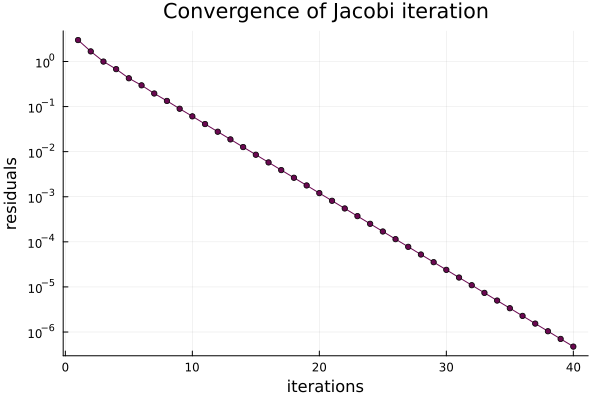

In [11]:
plot(normres_jacobi, color="#6b0851", leg=false)
scatter!(normres_jacobi, label="Jacobi", markersize=3, c="#6b0851", leg=false)
plot!(xaxis=("iterations") , yaxis = ("residuals", :log))
plot!(title="Convergence of Jacobi iteration")


## Método de Gauss-Seidel

Existe una estrecha relación de este método con el método de Jacobi. La única diferencia entre este los dos métodos es que en el método de Gauss-Seidel los valores más recientemente utilizados de las incógnitas se aplican en cada paso, incluso si la actualización se produce en el paso actual. 

### Iteración de Gauss-Seidel

De forma similar al método de Jacobi, se factoriza la matriz $A$ en la matriz $L$ que indica la matriz triangular inferior que incluye la diagonal principal de $A$, y la $U$ indica la matriz triangular superior (entradas arriba de la diagonal principal). Entonces $A = L + U$, y la ecuación que debe resolverse es $Lx + Ux = b$.

\begin{align}
  Ax &= b \\ 
  (L + U)x  &=  b \\ 
  Lx &= b - Ux  \\ 
  x &= L^{-1}(b-Ux)
\end{align}

Sea el sistema de ecuaciones de la forma $Ax=b$, dado un $x_0$ un vector inicial, la forma iterativa que converge a la solución es: $$x_{k+1}=L^{-1}(b-Ux_k)$$ para $k=0,1,2,...$ 

In [12]:
A = [3 1 -1; 2 4 1; -1 2 5];
b = [4, 1, 1];

In [13]:
L = tril(A)

3×3 Matrix{Int64}:
  3  0  0
  2  4  0
 -1  2  5

In [14]:
U = triu(A,1)

3×3 Matrix{Int64}:
 0  1  -1
 0  0   1
 0  0   0

In [15]:
x0

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [16]:
normres_gauss = [];
x = x0
for k = 1:40
    x = inv(L)*(b-U*x);
    normres_gauss = [normres_gauss;norm(b-A*x)];
end

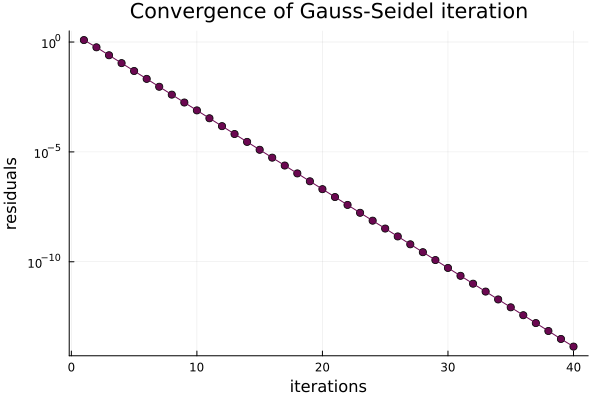

In [17]:
scatter(normres_gauss, markersize=4, c="#6b0851", leg=false)
plot!(normres_gauss, color="#6b0851", leg=false )
plot!(xaxis=("iterations") , yaxis = ("residuals", :log))
plot!(title="Convergence of Gauss-Seidel iteration")

## Jacobi vs Gauss-Seidel

La velocidad de convergencia del método de Gauss-Seidel es mayor a la convergencia del método de Jacobi.

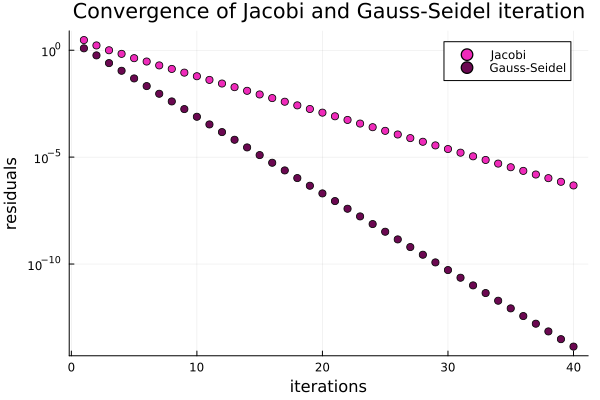

In [18]:
scatter(normres_jacobi, label="Jacobi", markersize=4, c="#ef2aba")
scatter!(normres_gauss, label="Gauss-Seidel", markersize=4, c="#6b0851")
plot!(xaxis=("iterations") , yaxis = ("residuals", :log))
plot!(title="Convergence of Jacobi and Gauss-Seidel iteration")

## Método de Sobre-Relajación Sucesiva (SRS)

Este método toma la dirección de Gauss-Seidel hacia la solución y lo "rebasa" para tratar de acelerar la convergencia. Sea $\omega$ un número real y defina cada componente de la nueva estimación $x_k+1$ como la media ponderada de $\omega$ veces la fórmula de Gauss-Seidel y $1-\omega$ veces la estimación actual de $x_k$. El número $\omega$ se conoce como el **parámetro de relajación**, y $\omega > 1$ se conoce como **sobre-relajación**.

### Iteración de SRS

El problema $Ax=b$ puede escribirse como $(L+D+U)x=b$ y, tras la multiplicación por $\omega$ el reordenamiento,
\begin{align}
 (\omega L + \omega D + \omega U)x &= \omega b \\
 (\omega L + D)x &= \omega b - \omega Ux + (1 - \omega)Dx \\
 x &= (\omega L + D)^{-1} [(1-\omega)Dx - \omega Ux] + \omega (D + \omega L)^{-1}b \\
\end{align}

Sea $x_0$ un vector inicial, la forma iterativa del método es $$x_{k+1} = (\omega L + D)^{-1} [(1-\omega)Dx_k - \omega Ux_k] + \omega (D + \omega L)^{-1}b$$ para $k = 1, 2, ...$

In [19]:
A = [3 1 -1; 2 4 1; -1 2 5];
b = [4, 1, 1];

In [20]:
D = Diagonal(A);
U = triu(A, 1);
L = tril(A, -1);
x0 = zeros(size(b));

Tomemos a $\omega = 1$

In [21]:
ω = 1.1

1.1

In [22]:
normres_srs = [];
x = x0
for k = 1:30
    x = inv(ω*L + D) * ((1-ω)*D*x - ω*U*x) + ω*inv(D+ω*L)*b;
    normres_srs = [normres_srs;norm(b-A*x)];
end

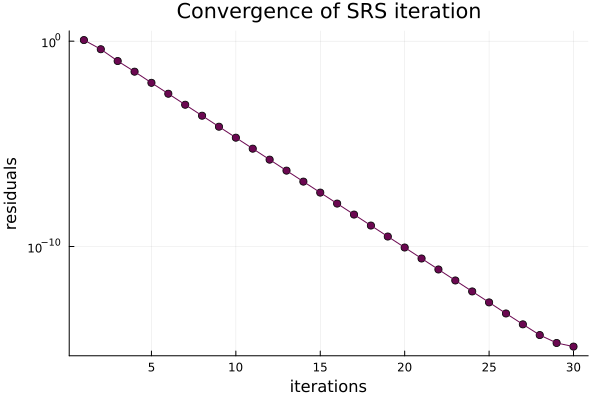

In [23]:
scatter(normres_srs, markersize=4, c="#6b0851", leg=false)
plot!(normres_srs, color="#6b0851", leg=false )
plot!(xaxis=("iterations") , yaxis = ("residuals", :log))
plot!(title="Convergence of SRS iteration")

### Convergencia del método SRS

Usemos diferentes valores de $\omega$

In [24]:
#using Pkg
#Pkg.add("LaTeXStrings")
#using LaTeXStrings

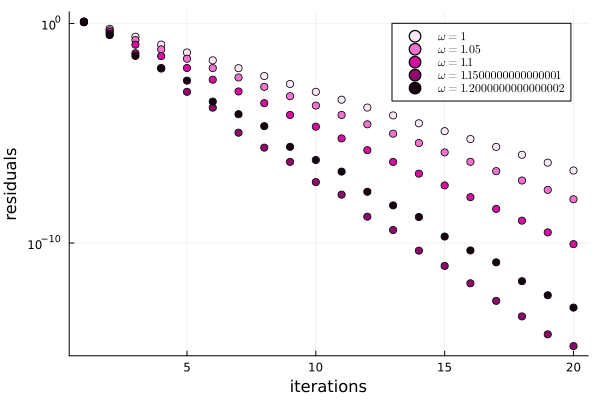

In [25]:
color = ["#fde7f7", "#f471d1", "#d510a1", "#8e0b6b", "#180212"]
p = plot()
ω = 1
for i = 1:5
    normres_srss = [];
    x = x0
    for k = 1:20
        x = inv(ω*L + D) * ((1-ω)*D*x - ω*U*x) + ω*inv(D+ω*L)*b;
        normres_srss = [normres_srss;norm(b-A*x)];
    end
    p = scatter!(normres_srss, markersize=4, label = "\$\\omega=$ω\$", c=color[i])
    p = plot!(xaxis=("iterations") , yaxis = ("residuals", :log))
    ω = ω + 0.05
end
display(p)

Exploremos la velocidad de convergencia de los métodos iterativos expuestos

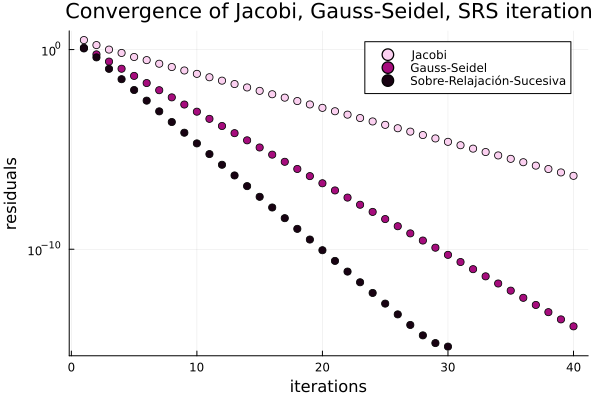

In [26]:
scatter(normres_jacobi, label="Jacobi", markersize=4, c="#fbd0f0")
scatter!(normres_gauss, label="Gauss-Seidel", markersize=4, c="#a60c7d")
scatter!(normres_srs, label="Sobre-Relajación-Sucesiva", markersize=4, c="#180212")
plot!(xaxis=("iterations") , yaxis = ("residuals", :log))
plot!(title="Convergence of Jacobi, Gauss-Seidel, SRS iteration")

> Los métodos iterativos tienen un precio: la convergencia del método depende en fuerte medida de la matriz $A$.

## Ejercicio

Compare Jacobi, Gauss-Seidel y SRS aplicados sobre el sistema de seis ecuaciones con seis incógnitas:
$$
\left[ \begin{array}{rrrrrr}
   3  & -1   & 0  & 0  & 0   & 1/2 \\
   -1 &  3   & -1 & 0  & 1/2 &  0 \\
   0  & -1   & 3  & -1 & 0   &  0 \\
   0  &  0   & -1 & 3  & -1  &  0 \\
   0  &  1/2 & 0  & -1 & 3   & -1 \\
   1/2 &  0  & 0  & 0  & -1  &  3 \\
   \end{array} \right]
\begin{bmatrix}
   u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \\ u_6 \\
\end{bmatrix}
   =
\begin{bmatrix}
   5/2 \\ 3/2 \\ 1 \\ 1 \\ 3/2 \\ 5/2 \\
\end{bmatrix}
$$  
La solución es $x = [1, 1, 1, 1, 1, 1] $

In [27]:
A = [3 -1  0  0  0  1/2; 
    -1  3 -1  0 1/2  0 ;
     0 -1  3 -1  0   0 ;
     0  0  -1 3 -1   0 ;
     0 1/2 0 -1  3  -1 ;
     1/2 0 0  0  -1  3 ;]

6×6 Matrix{Float64}:
  3.0  -1.0   0.0   0.0   0.0   0.5
 -1.0   3.0  -1.0   0.0   0.5   0.0
  0.0  -1.0   3.0  -1.0   0.0   0.0
  0.0   0.0  -1.0   3.0  -1.0   0.0
  0.0   0.5   0.0  -1.0   3.0  -1.0
  0.5   0.0   0.0   0.0  -1.0   3.0

In [28]:
b = [5/2, 3/2, 1, 1, 3/2, 5/2]

6-element Vector{Float64}:
 2.5
 1.5
 1.0
 1.0
 1.5
 2.5

In [29]:
A\b

6-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [30]:
D = Diagonal(A)

6×6 Diagonal{Float64, Vector{Float64}}:
 3.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   3.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   3.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   3.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   3.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   3.0

In [31]:
L = tril(A, -1)

6×6 Matrix{Float64}:
  0.0   0.0   0.0   0.0   0.0  0.0
 -1.0   0.0   0.0   0.0   0.0  0.0
  0.0  -1.0   0.0   0.0   0.0  0.0
  0.0   0.0  -1.0   0.0   0.0  0.0
  0.0   0.5   0.0  -1.0   0.0  0.0
  0.5   0.0   0.0   0.0  -1.0  0.0

In [32]:
U = triu(A, 1)

6×6 Matrix{Float64}:
 0.0  -1.0   0.0   0.0   0.0   0.5
 0.0   0.0  -1.0   0.0   0.5   0.0
 0.0   0.0   0.0  -1.0   0.0   0.0
 0.0   0.0   0.0   0.0  -1.0   0.0
 0.0   0.0   0.0   0.0   0.0  -1.0
 0.0   0.0   0.0   0.0   0.0   0.0

In [33]:
x0 = zeros(size(b))

6-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [34]:
ω = 1.05

1.05

In [35]:
normres_srs = [];
x = x0
for k = 1:50
    x = inv(ω*L + D) * ((1-ω)*D*x - ω*U*x) + ω*inv(D+ω*L)*b;
    normres_srs = [normres_srs;norm(b-A*x)];
end

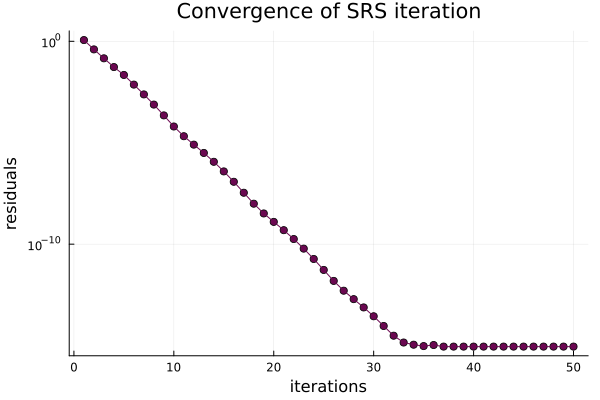

In [36]:
scatter(normres_srs, markersize=4, c="#6b0851", leg=false)
plot!(normres_srs, color="#6b0851", leg=false )
plot!(xaxis=("iterations") , yaxis = ("residuals", :log))
plot!(title="Convergence of SRS iteration")

In [37]:
x

6-element Vector{Float64}:
 1.0
 1.0
 0.9999999999999998
 0.9999999999999998
 0.9999999999999999
 1.0